In [ ]:
# ============================================
# 🚦 PrePlanGo Dual ML Model Trainer (Colab Version)
# Trains:
#   1️⃣ RandomForestClassifier (Traffic Density)
#   2️⃣ RandomForestRegressor (Time Delay)
# ============================================

# === STEP 1: Import libraries ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
import joblib
from google.colab import files

# === STEP 2: Upload dataset interactively ===
print("📤 Please upload your dataset file (October_Traffic_Dataset.csv):")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]
print(f"✅ File '{file_name}' uploaded successfully!\n")

# === STEP 3: Load dataset ===
df = pd.read_csv(file_name)
print("📊 Columns in dataset:")
print(df.columns.tolist(), "\n")

# === STEP 4: Basic data cleanup ===
# Check the number of rows before dropping missing values
initial_rows = df.shape[0]
print(f"Initial number of rows: {initial_rows}")

# Drop rows with missing values only if there are any
if df.isnull().sum().sum() > 0:
    # Drop rows with missing values in target columns
    target_cols = [density_col, delay_col] # Assuming density_col and delay_col are defined by now
    df = df.dropna(subset=target_cols)
    print(f"Number of rows after dropping missing values in target columns: {df.shape[0]}")

# Check if the dataframe is empty after dropping NaNs
if df.empty:
    raise ValueError("❌ Dataframe is empty after removing missing values. Please check your dataset.")

# Replace remaining NaN with 0 (This might not be necessary if dropna was effective, but keeping as per original code)
df = df.fillna(0)

# === STEP 5: Identify categorical and numeric columns ===
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("🔠 Categorical columns detected:", categorical_cols)
print("🔢 Numeric columns detected:", numeric_cols, "\n")

# === STEP 6: Encode categorical columns ===
encoder = LabelEncoder()
for col in categorical_cols:
    try:
        # Check if the column has any non-null values before encoding
        if not df[col].isnull().all():
            df[col] = encoder.fit_transform(df[col].astype(str))
        else:
            print(f"⚠️ Column {col} contains only missing values and will not be encoded.")
    except Exception as e:
        print(f"⚠️ Could not encode column {col}: {e}")

# === STEP 7: Automatically find target columns ===
density_col, delay_col = None, None
for col in df.columns:
    col_lower = col.lower()
    if "traffic" in col_lower and "density" in col_lower:
        density_col = col
    if "delay" in col_lower:
        delay_col = col

if not density_col:
    raise ValueError("❌ Could not find a column related to 'Traffic Density'.")
if not delay_col:
    raise ValueError("❌ Could not find a column related to 'Delay'.")

print(f"🎯 Classification Target: {density_col}")
print(f"🎯 Regression Target: {delay_col}\n")

# === STEP 8: Define features and targets ===
# Ensure target columns are not included in the features
X_class = df.drop(columns=[density_col], errors='ignore')
y_class = df[density_col]

X_reg = df.drop(columns=[delay_col], errors='ignore')
y_reg = df[delay_col]

# Check if feature or target dataframes are empty before splitting
if X_class.empty or y_class.empty or X_reg.empty or y_reg.empty:
     raise ValueError("❌ Feature or target dataframes are empty after defining. Please check your dataset and target column names.")


# === STEP 9: Split data ===
# Check the number of samples before splitting
n_samples_class = X_class.shape[0]
n_samples_reg = X_reg.shape[0]

if n_samples_class == 0 or n_samples_reg == 0:
    raise ValueError("❌ Cannot split data with 0 samples. Please check your dataset.")

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print(f"Split data into training and testing sets with {n_samples_class} samples for classification and {n_samples_reg} for regression.\n")


# === STEP 10: Train models ===
print("🚀 Training RandomForestClassifier for Traffic Density...")
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(Xc_train, yc_train)

print("🚀 Training RandomForestRegressor for Time Delay...")
reg = RandomForestRegressor(n_estimators=200, random_state=42)
reg.fit(Xr_train, yr_train)

# === STEP 11: Evaluate ===
y_pred_class = clf.predict(Xc_test)
y_pred_reg = reg.predict(Xr_test)

acc = accuracy_score(yc_test, y_pred_class)
mae = mean_absolute_error(yr_test, y_pred_reg)

print("\n📈 Evaluation Results:")
print(f" - Classification Accuracy: {acc:.3f}")
print(f" - Regression Mean Absolute Error (MAE): {mae:.3f}\n")

# === STEP 12: Save models ===
clf_filename = "traffic_density_classifier.joblib"
reg_filename = "time_delay_regressor.joblib"

joblib.dump(clf, clf_filename)
joblib.dump(reg, reg_filename)

print("💾 Models saved successfully:")
print(f" - {clf_filename}")
print(f" - {reg_filename}\n")

# === STEP 13: Download trained models ===
files.download(clf_filename)
files.download(reg_filename)

print("⬇️ Models ready for download. You can now integrate them into your FastAPI backend!")

📤 Please upload your dataset file (October_Traffic_Dataset.csv):


Saving October_Traffic_Dataset.csv to October_Traffic_Dataset (2).csv
✅ File 'October_Traffic_Dataset (2).csv' uploaded successfully!

📊 Columns in dataset:
['Sl No', 'Timestamp', 'Day of Week', 'Weekday/Weekend', 'Weather', 'Festival/Holiday', 'Calamities', 'Road Construction', 'Traffic Density', 'Time Delay (min)', 'Vehicle Density (veh/km)'] 

Initial number of rows: 2976
Number of rows after dropping missing values in target columns: 2976
🔠 Categorical columns detected: ['Timestamp', 'Day of Week', 'Weekday/Weekend', 'Weather', 'Festival/Holiday', 'Calamities', 'Road Construction', 'Traffic Density']
🔢 Numeric columns detected: ['Sl No', 'Time Delay (min)', 'Vehicle Density (veh/km)'] 

🎯 Classification Target: Traffic Density
🎯 Regression Target: Time Delay (min)

Split data into training and testing sets with 2976 samples for classification and 2976 for regression.

🚀 Training RandomForestClassifier for Traffic Density...
🚀 Training RandomForestRegressor for Time Delay...

📈 Eval

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Models ready for download. You can now integrate them into your FastAPI backend!


✅ Dataset loaded successfully!
📌 Columns: ['Sl No', 'Timestamp', 'Day of Week', 'Weekday/Weekend', 'Weather', 'Festival/Holiday', 'Calamities', 'Road Construction', 'Traffic Density', 'Time Delay (min)', 'Vehicle Density (veh/km)']


,Sl No,Timestamp,Day of Week,Weekday/Weekend,Weather,Festival/Holiday,Calamities,Road Construction,Traffic Density,Time Delay (min),Vehicle Density (veh/km)
0,1,2025-10-01 00:00,Wednesday,Weekday,Clear,NaN,NaN,NaN,Low,4,38
1,2,2025-10-01 00:15,Wednesday,Weekday,Clear,NaN,NaN,NaN,Low,5,22
2,3,2025-10-01 00:30,Wednesday,Weekday,Sunny,NaN,NaN,NaN,Medium,9,59
3,4,2025-10-01 00:45,Wednesday,Weekday,Sunny,NaN,NaN,NaN,Low,1,33
4,5,2025-10-01 01:00,Wednesday,Weekday,Cloudy,NaN,NaN,NaN,Low,3,21



🔠 All categorical columns encoded successfully!


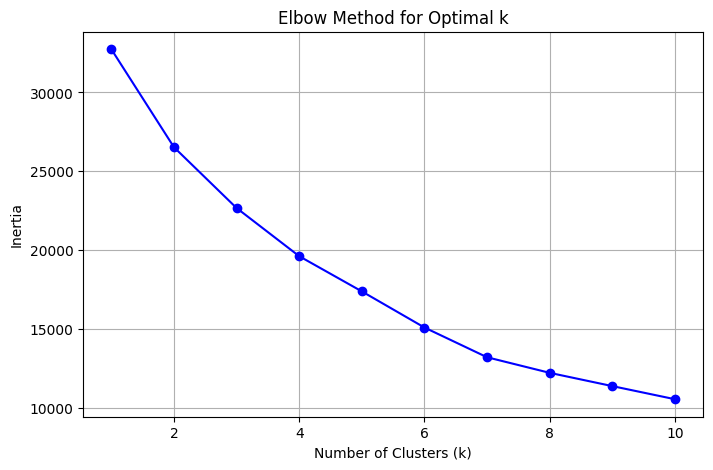

📉 Choose the optimal k (the elbow point, e.g., 3 or 4)


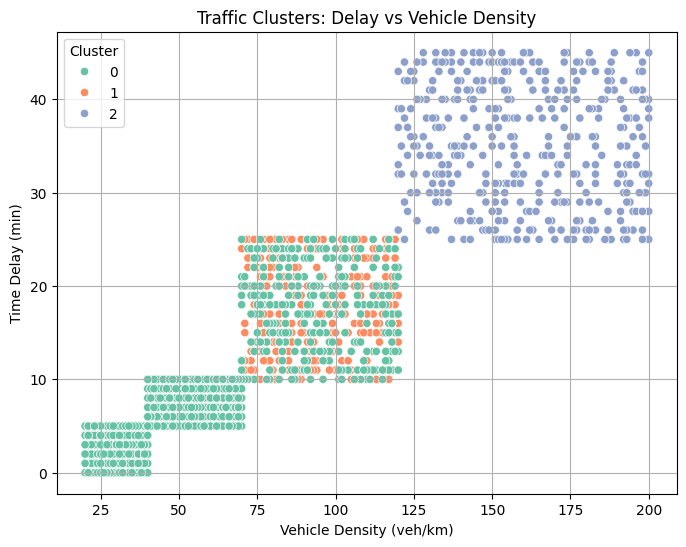

ValueError: Data must be 1-dimensional, got ndarray of shape (2976, 2) instead

In [ ]:
# ==========================================
# 🚦 Traffic Pattern Clustering (K-Means) + Visual Insights
# ==========================================

# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from google.colab import files

# 📥 Step 2: Load dataset
file_path = "/content/October_Traffic_Dataset.csv"
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print("📌 Columns:", df.columns.tolist())
display(df.head())

# 🧹 Step 3: Encode categorical columns
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

print("\n🔠 All categorical columns encoded successfully!")

# ⚖️ Step 4: Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# 💡 Step 5: Elbow Method for optimal clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

print("📉 Choose the optimal k (the elbow point, e.g., 3 or 4)")

# ✳️ Step 6: Apply KMeans with chosen k
optimal_k = 3  # 👈 adjust after viewing elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded['Traffic_Cluster'] = kmeans.fit_predict(df_scaled)

# 🧠 Step 7: Add cluster back to original DataFrame
df['Traffic_Cluster'] = df_encoded['Traffic_Cluster']

# 📊 Step 8: Visualizations

# 1️⃣ Scatter Plot: Delay vs Vehicle Density
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Vehicle Density (veh/km)',
    y='Time Delay (min)',
    hue='Traffic_Cluster',
    palette='Set2'
)
plt.title('Traffic Clusters: Delay vs Vehicle Density')
plt.xlabel('Vehicle Density (veh/km)')
plt.ylabel('Time Delay (min)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 2️⃣ Pair Plot (Visualize multiple feature relationships)
# Exclude non-numeric or problematic columns from pairplot
numeric_cols_for_pairplot = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove 'Sl No' and potentially other non-informative numeric columns if needed
if 'Sl No' in numeric_cols_for_pairplot:
    numeric_cols_for_pairplot.remove('Sl No')
if 'Traffic_Cluster' in numeric_cols_for_pairplot:
    numeric_cols_for_pairplot.remove('Traffic_Cluster')


if numeric_cols_for_pairplot: # Check if there are columns left for pairplot
    sns.pairplot(df[numeric_cols_for_pairplot + ['Traffic_Cluster']], hue='Traffic_Cluster', palette='Set2', diag_kind='kde')
    plt.suptitle("Pair Plot of Traffic Features by Cluster", y=1.02)
    plt.show()
else:
    print("⚠️ Not enough numeric columns to generate a pair plot.")


# 3️⃣ Heatmap: Feature Correlations
plt.figure(figsize=(10, 6))
corr = df_encoded.corr(numeric_only=True) # Ensure only numeric columns are used for correlation
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 4️⃣ Cluster Counts
plt.figure(figsize=(6,4))
sns.countplot(x='Traffic_Cluster', data=df, palette='Set2')
plt.title("Number of Records per Cluster")
plt.xlabel("Traffic Cluster")
plt.ylabel("Count")
plt.show()

# 📈 Step 9: Cluster Characteristics
cluster_summary = df.groupby('Traffic_Cluster').mean(numeric_only=True)
print("\n📊 Cluster Characteristics (Mean values):")
display(cluster_summary)

# 💾 Step 10: Save & download
output_file = "Traffic_Clusters.csv"
df.to_csv(output_file, index=False)
print(f"\n✅ Clustered dataset saved as '{output_file}'")

files.download(output_file)